In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import matplotlib as mpl



In [3]:
# ---------- CMS Style ----------
plt.style.use('default')
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3

In [4]:
## in this file PUPPI == PF candidates
#file_path = "/eos/cms/store/cmst3/group/l1tr/elfontan/l1tPFplusPuppi/fp_ntuples_NNVtx_151X/TT_PU200/FP/151Xv0/perfNano_16283968_110.root"
file_path = "/eos/cms/store/cmst3/group/l1tr/elfontan/l1tPFplusPuppi/fp_ntuples_NNVtx_151X/TT_PU200/perfNano_PU200.root"

file = uproot.open(file_path)
events = file["Events"]
print("Branches in 'Events':")
print(events.keys())
print(len(events))

n_events_to_process = 10000

Branches in 'Events':
['run', 'luminosityBlock', 'event', 'bunchCrossing', 'orbitNumber', 'nTkEleL2', 'TkEleL2_charge', 'TkEleL2_hwQual', 'TkEleL2_caloEta', 'TkEleL2_caloPhi', 'TkEleL2_eta', 'TkEleL2_idScore', 'TkEleL2_pfIso', 'TkEleL2_pfIsoPV', 'TkEleL2_phi', 'TkEleL2_pt', 'TkEleL2_puppiIso', 'TkEleL2_puppiIsoPV', 'TkEleL2_tkEta', 'TkEleL2_tkIso', 'TkEleL2_tkIsoPV', 'TkEleL2_tkPhi', 'TkEleL2_tkPt', 'TkEleL2_vz', 'nTkEmL2', 'TkEmL2_hwQual', 'TkEmL2_eta', 'TkEmL2_pfIso', 'TkEmL2_pfIsoPV', 'TkEmL2_phi', 'TkEmL2_pt', 'TkEmL2_puppiIso', 'TkEmL2_puppiIsoPV', 'TkEmL2_tkIso', 'TkEmL2_tkIsoPV', 'nDecEmCaloBarrel', 'DecEmCaloBarrel_hwEta', 'DecEmCaloBarrel_hwPhi', 'DecEmCaloBarrel_hwQual', 'DecEmCaloBarrel_eta', 'DecEmCaloBarrel_phi', 'DecEmCaloBarrel_pt', 'nDecEmCaloHGCalNoTK', 'DecEmCaloHGCalNoTK_hwEta', 'DecEmCaloHGCalNoTK_hwPhi', 'DecEmCaloHGCalNoTK_hwQual', 'DecEmCaloHGCalNoTK_eta', 'DecEmCaloHGCalNoTK_phi', 'DecEmCaloHGCalNoTK_pt', 'nDecEmCaloHGCal', 'DecEmCaloHGCal_hwEta', 'DecEmCaloHGCa

## Check for basic MET computation

In [5]:
arrays = events.arrays(
    entry_start=0, 
    entry_stop=n_events_to_process, 
    library="np"
)
puppi_pt = arrays["L1PuppiCands_pt"]
puppi_phi = arrays["L1PuppiCands_phi"]
puppi_eta = arrays["L1PuppiCands_eta"]
puppi_mass = arrays["L1PuppiCands_mass"]

In [6]:
puppi_met_x = [-np.sum(pt * np.cos(phi)) for pt, phi in zip(puppi_pt, puppi_phi)]
puppi_met_y = [-np.sum(pt * np.sin(phi)) for pt, phi in zip(puppi_pt, puppi_phi)]
puppi_met = [np.sqrt(mx**2 + my**2) for mx, my in zip(puppi_met_x, puppi_met_y)]

In [7]:
puppi_met_stored = arrays["L1PuppiMet_pt"]
puppi_met_diff = np.array(puppi_met) - np.array(puppi_met_stored)
print("First 10 calculated vs stored MET:")
for i in range(10):
    print(puppi_met_diff[i])
    if puppi_met_diff[i] > 0 or puppi_met_diff[i] < 0:
        print(f"Event {i}: calc={puppi_met[i]:.2f}, stored={puppi_met_stored[i]:.2f}, diff={puppi_met_diff[i]:.2f}")

First 10 calculated vs stored MET:
-1.4591270648622867e-05
Event 0: calc=21.30, stored=21.30, diff=-0.00
-7.649041286583724e-06
Event 1: calc=37.65, stored=37.65, diff=-0.00
1.6173920869277936e-06
Event 2: calc=211.51, stored=211.51, diff=0.00
-1.448574357709731e-05
Event 3: calc=223.31, stored=223.31, diff=-0.00
1.9577219084965236e-05
Event 4: calc=62.80, stored=62.80, diff=0.00
2.4152003874178263e-05
Event 5: calc=100.62, stored=100.62, diff=0.00
5.401720547304478e-06
Event 6: calc=7.45, stored=7.45, diff=0.00
2.173514872083615e-05
Event 7: calc=27.98, stored=27.98, diff=0.00
-1.4587412067612604e-05
Event 8: calc=167.22, stored=167.22, diff=-0.00
-1.7711426515631956e-05
Event 9: calc=28.66, stored=28.66, diff=-0.00


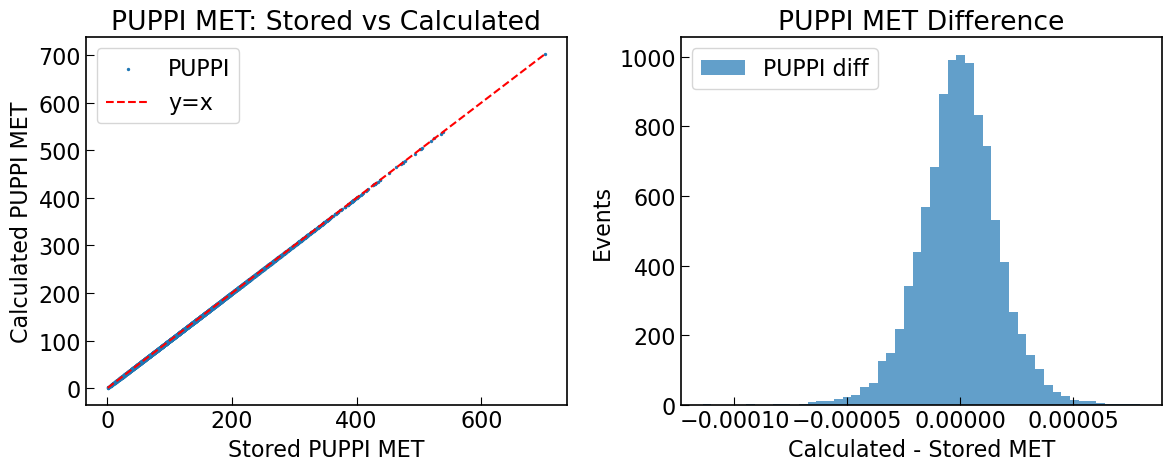

In [8]:
# Plot MET comparisons
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(puppi_met_stored, puppi_met, s=2, label='PUPPI')
plt.plot([min(puppi_met_stored), max(puppi_met_stored)], [min(puppi_met_stored), max(puppi_met_stored)], 'r--', label='y=x')
plt.xlabel('Stored PUPPI MET')
plt.ylabel('Calculated PUPPI MET')
plt.legend()
plt.title('PUPPI MET: Stored vs Calculated')

plt.subplot(1,2,2)
plt.hist(puppi_met_diff, bins=50, alpha=0.7, label='PUPPI diff')
plt.xlabel('Calculated - Stored MET')
plt.ylabel('Events')
plt.title('PUPPI MET Difference')
plt.legend()
plt.tight_layout()
plt.show()



## Check for PUPPI and PF multiplicity


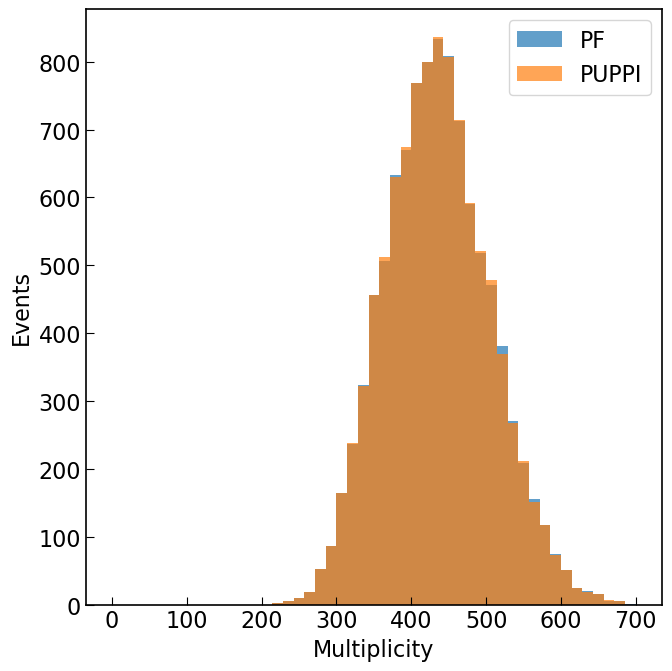

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [9]:
n_pf = arrays["nL1PFCands"]
n_puppi = arrays["nL1PuppiCands"]

# Plot multiplicities
plt.figure(figsize=(7,7))
bins = np.linspace(0, 700, 50)  # 10 bins from 0 to 30

plt.hist(n_pf, bins=bins, alpha=0.7, label='PF')
plt.hist(n_puppi, bins=bins, alpha=0.7, label='PUPPI')
plt.xlabel('Multiplicity')
plt.ylabel('Events')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(7,7))




## Make original PUPPI collection

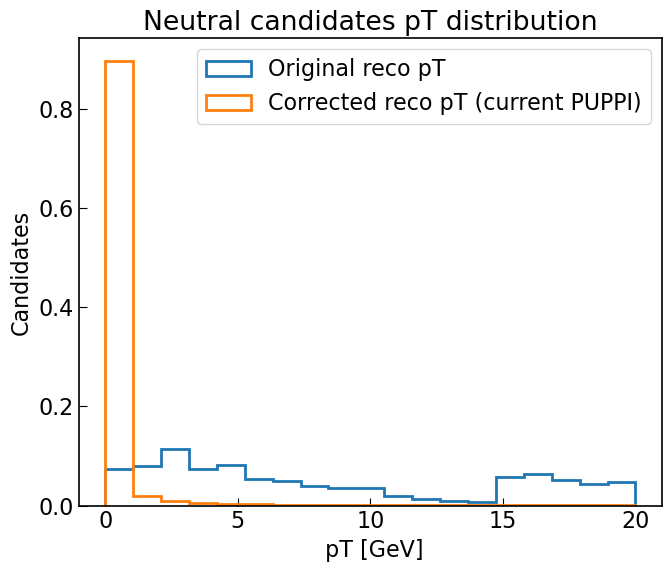

In [11]:
# Load branches
pt = arrays["L1PuppiCands_pt"]
phi = arrays["L1PuppiCands_phi"]
eta = arrays["L1PuppiCands_eta"]
mass = arrays["L1PuppiCands_mass"]
weight = arrays["L1PuppiCands_puppiWeight"]
charge = arrays["L1PuppiCands_charge"]
nnVtxScore = arrays["L1PuppiCands_nnVtxScore"]
pdgid = arrays["L1PuppiCands_pdgId"]



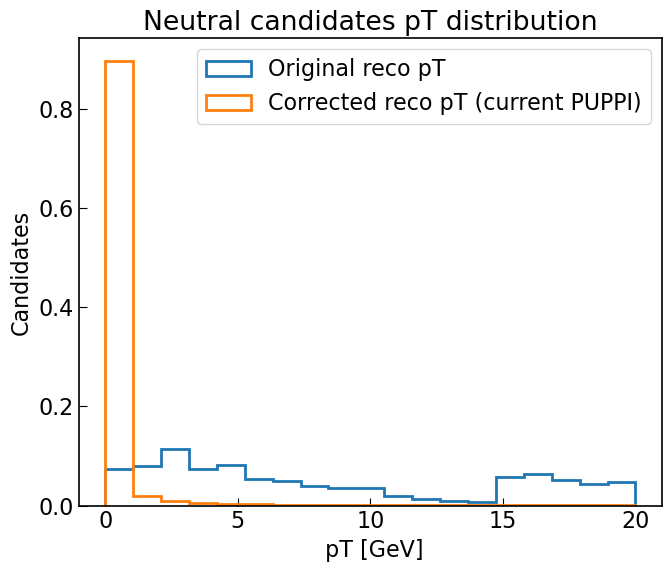

In [12]:

# Convert to awkward arrays
akpt     = ak.Array(pt)
akweight = ak.Array(weight)
akcharge = ak.Array(charge)

# --- SELECT ONLY NEUTRAL CANDIDATES ---
neutral_mask = (akcharge == 0)

pt_neutral     = akpt[neutral_mask]
weight_neutral = akweight[neutral_mask]

# Corrected pT (current PUPPI weight)
pt_corr_neutral = pt_neutral * weight_neutral

# --- SAFE FLATTENING ---
flat_pt = ak.flatten(pt_neutral, axis=None).to_numpy()
flat_pt_corr = ak.flatten(pt_corr_neutral, axis=None).to_numpy()

# Remove None/NaN
flat_pt = flat_pt[np.isfinite(flat_pt)]
flat_pt_corr = flat_pt_corr[np.isfinite(flat_pt_corr)]

# -------------------------------
#        Plot
# -------------------------------
plt.figure(figsize=(7,6))
bins = np.linspace(0, 20, 20)

plt.hist(flat_pt, bins=bins, histtype="step", linewidth=2, density=True,
         label="Original reco pT")
plt.hist(flat_pt_corr, bins=bins, histtype="step", linewidth=2, density=True,
         label="Corrected reco pT (current PUPPI)")

plt.xlabel(" pT [GeV]")
plt.ylabel("Candidates")
plt.title("Neutral candidates pT distribution")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [13]:
selected_counts = []
selected_pts = []     # list of lists
selected_etas = []
selected_phis = []
selected_masses = []
selected_effective_pts = []  # pt after weighting (for MET)

for iev in range(len(pt)):

    sel_pt = []
    sel_eta = []
    sel_phi = []
    sel_mass = []
    sel_effpt = []   # pt used in MET (pt*weight or pt)

    for pt_i, weight_i, charge_i, nnVtxScore_i, eta_i, phi_i, mass_i, pdgid_i in zip(
            pt[iev], weight[iev], charge[iev], nnVtxScore[iev],
            eta[iev], phi[iev], mass[iev], pdgid[iev]):

        abs_eta = abs(eta_i)

        ###############
        # Barrel
        ###############
        if abs_eta < 1.5:

            if charge_i == 0:
                if pt_i * weight_i > 1.0:
                    eff_pt = pt_i * weight_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)
            if charge_i !=0:
                if nnVtxScore_i > 0.1:
                    eff_pt = pt_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)
        ###############
        # HGCAL with TK
        ###############
        if 1.5 < abs_eta < 2.5:

            if charge_i == 0:
                if pt_i * weight_i > 1:
                    eff_pt = pt_i * weight_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)

            if charge_i !=0:
                if nnVtxScore_i > 0.1:
                    eff_pt = pt_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)
        ###############
        # HGCAL no-TK
        ###############
        elif 2.5 < abs_eta < 3.0:
            continue  # your original code skipped them

        ###############
        # HF
        ###############
        elif 3.0 < abs_eta < 5.2:
            continue  # skipped in your code
    # store per-event results to compute the MET later
    selected_counts.append(len(sel_effpt))     # same as before, but using final selected
    selected_pts.append(sel_pt)
    selected_etas.append(sel_eta)
    selected_phis.append(sel_phi)
    selected_masses.append(sel_mass)
    selected_effective_pts.append(sel_effpt)

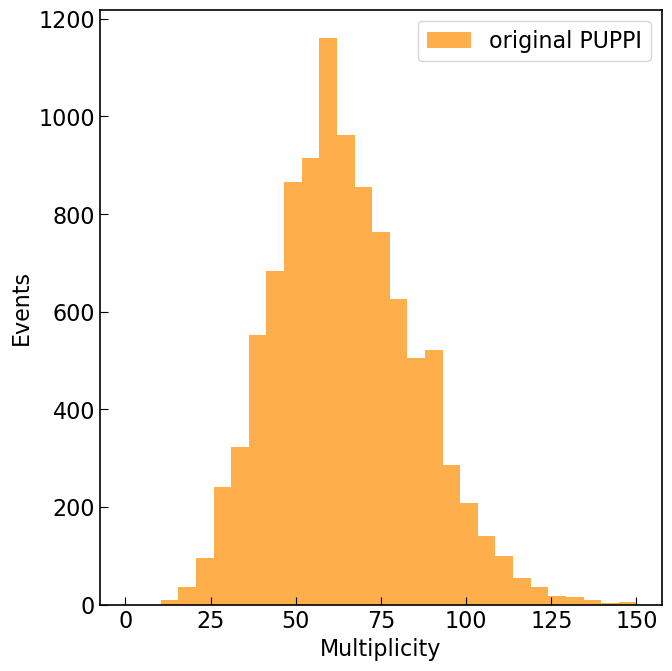

In [14]:
# Plot.original PUPPI collection
plt.figure(figsize=(7,7))

bins = np.linspace(0, 150, 30)  # 10 bins from 0 to 30
plt.hist(selected_counts, bins=bins, alpha=0.7, color='darkorange', label='original PUPPI')
plt.xlabel('Multiplicity')
plt.ylabel('Events')
plt.legend()


plt.tight_layout()
plt.show()

## Make the new PUPPI collection using new target as PUPPI weight

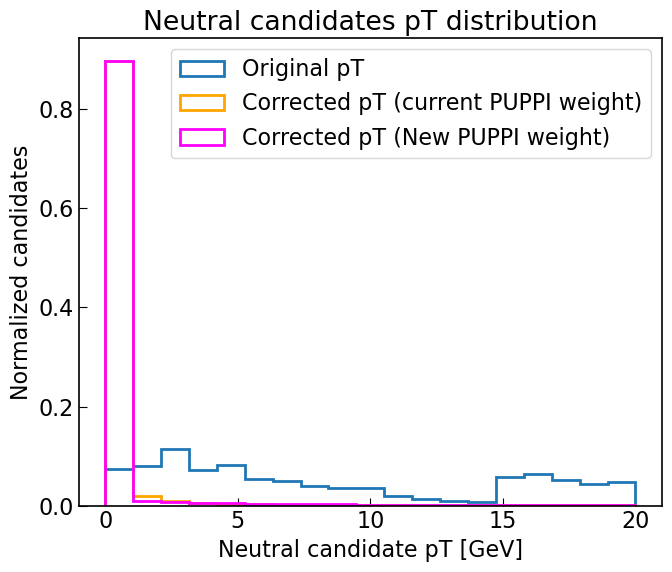

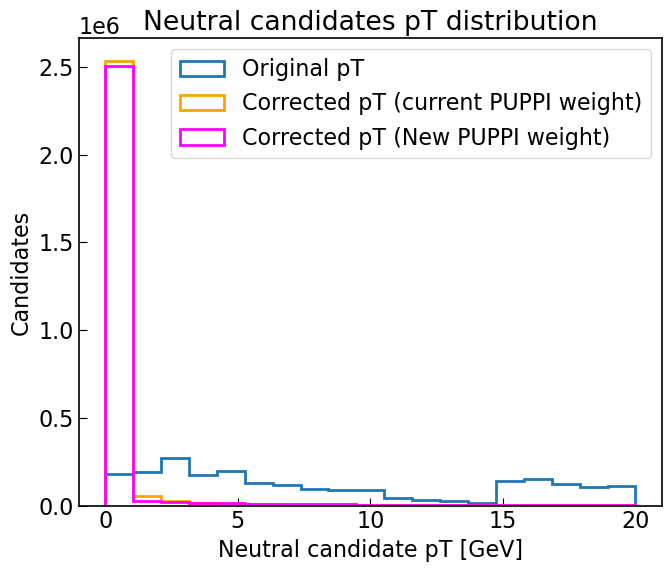

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

# -------------------------
# Extract branches
# -------------------------
genPtSum  = arrays["L1PuppiCands_genChargedPtSum0p2"]
recoPtSum = arrays["L1PuppiCands_recoChargedPtSum0p2"]



# -------------------------
# Compute *new* PUPPI weight
# -------------------------
new_weight = genPtSum / (recoPtSum + 1e-6)

# Convert to awkward
akpt          = ak.Array(pt)
akcharge      = ak.Array(charge)
ak_old_weight = ak.Array(weight)
ak_new_weight = ak.Array(new_weight)

# -------------------------
# MASK FOR NEUTRAL CANDIDATES ONLY
# -------------------------
neutral_mask = (akcharge == 0)

pt_neutral        = akpt[neutral_mask]
old_weight_neutral = ak_old_weight[neutral_mask]
new_weight_neutral = ak_new_weight[neutral_mask]

# Corrected pTs
pt_corr_old = pt_neutral * old_weight_neutral
pt_corr_new = pt_neutral * new_weight_neutral

# -------------------------
# Flatten safely
# -------------------------
flat_pt        = ak.flatten(pt_neutral, axis=None).to_numpy()
flat_pt_old    = ak.flatten(pt_corr_old, axis=None).to_numpy()
flat_pt_new    = ak.flatten(pt_corr_new, axis=None).to_numpy()

# Remove non-finite
flat_pt        = flat_pt[np.isfinite(flat_pt)]
flat_pt_old    = flat_pt_old[np.isfinite(flat_pt_old)]
flat_pt_new    = flat_pt_new[np.isfinite(flat_pt_new)]

# -------------------------
# Plot
# -------------------------
plt.figure(figsize=(7,6))
bins = np.linspace(0, 20, 20)

plt.hist(flat_pt, bins=bins, histtype="step", linewidth=2, density=True,
         label="Original pT ")
plt.hist(flat_pt_old, bins=bins, histtype="step", linewidth=2, density=True,color='orange',
         label="Corrected pT (current PUPPI weight)")
plt.hist(flat_pt_new, bins=bins, histtype="step", linewidth=2, density=True,color='magenta',
         label="Corrected pT (New PUPPI weight)")

plt.xlabel("Neutral candidate pT [GeV]")
plt.ylabel("Normalized candidates")
plt.legend()
plt.title("Neutral candidates pT distribution")

plt.grid(False)
plt.tight_layout()
plt.show()


plt.figure(figsize=(7,6))
bins = np.linspace(0, 20, 20)

plt.hist(flat_pt, bins=bins, histtype="step", linewidth=2, density=False,
         label="Original pT ")
plt.hist(flat_pt_old, bins=bins, histtype="step", linewidth=2, density=False,color='orange',
         label="Corrected pT (current PUPPI weight)")
plt.hist(flat_pt_new, bins=bins, histtype="step", linewidth=2, density=False,color='magenta',
         label="Corrected pT (New PUPPI weight)")

plt.xlabel("Neutral candidate pT [GeV]")
plt.ylabel("Candidates")
plt.legend()
plt.title("Neutral candidates pT distribution")

plt.grid(False)
plt.tight_layout()
plt.show()


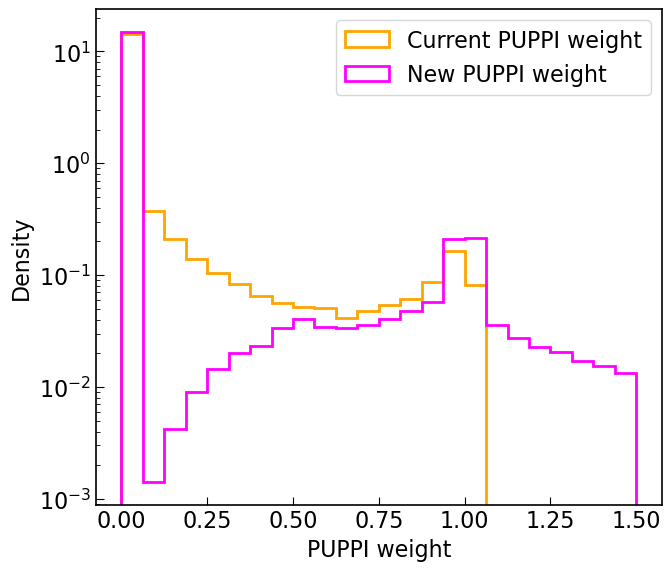

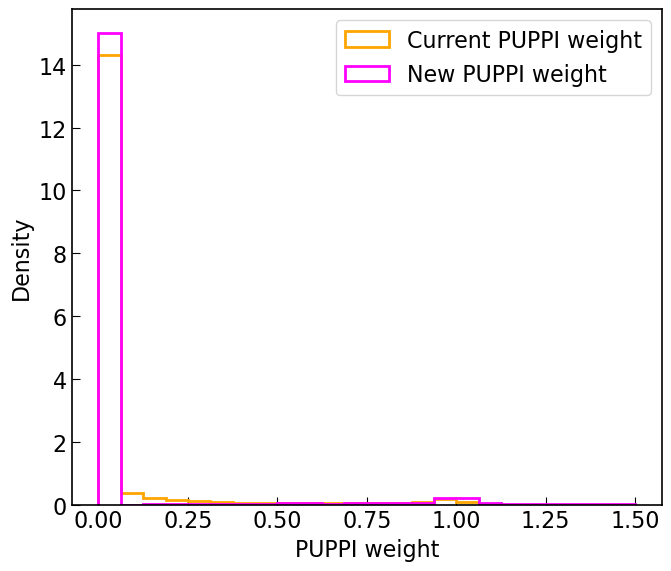

In [26]:
ak_old_w = ak.Array(weight)
ak_new_w = ak.Array(new_weight)
ak_charge = ak.Array(charge)

neutral_mask = (ak_charge == 0)

old_w_neu = ak_old_w[neutral_mask]
new_w_neu = ak_new_w[neutral_mask]
flat_old_w     = ak.flatten(old_w_neu, axis=None).to_numpy()
flat_new_w     = ak.flatten(new_w_neu, axis=None).to_numpy()

plt.figure(figsize=(7,6))
bins = np.linspace(0, 1.5, 25)

plt.hist(flat_old_w, bins=bins, histtype="step", linewidth=2, density=True, color='orange',
         label="Current PUPPI weight")
plt.hist(flat_new_w, bins=bins, histtype="step", linewidth=2, density=True, color='magenta',
         label="New PUPPI weight")

plt.xlabel("PUPPI weight")
plt.ylabel("Density")
plt.yscale("log")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
bins = np.linspace(0, 1.5, 25)

plt.hist(flat_old_w, bins=bins, histtype="step", linewidth=2, density=True, color='orange',
         label="Current PUPPI weight")
plt.hist(flat_new_w, bins=bins, histtype="step", linewidth=2, density=True, color='magenta',
         label="New PUPPI weight")

plt.xlabel("PUPPI weight")
plt.ylabel("Density")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [19]:
# NEW PUPPI selection storage
new_selected_counts = []
new_selected_pts = []
new_selected_etas = []
new_selected_phis = []
new_selected_masses = []
new_selected_effective_pts = []

for iev in range(len(pt)):

    sel_pt = []
    sel_eta = []
    sel_phi = []
    sel_mass = []
    sel_effpt = []

    for pt_i, weight_i, charge_i, nnVtxScore_i, eta_i, phi_i, mass_i, pdgid_i in zip(
            pt[iev], new_weight[iev], charge[iev], nnVtxScore[iev],
            eta[iev], phi[iev], mass[iev], pdgid[iev]):

        abs_eta = abs(eta_i)

        ########################################
        # Barrel
        ########################################
        if abs_eta < 1.5:

            if charge_i == 0:
                if pt_i * weight_i > 1.0:
                    eff_pt = pt_i * weight_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)

            else:
                if nnVtxScore_i > 0.1:
                    eff_pt = pt_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)

        ########################################
        # HGCAL with TK
        ########################################
        elif 1.5 < abs_eta < 2.5:

            if charge_i == 0:
                if pt_i * weight_i > 1.0:
                    eff_pt = pt_i * weight_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)

            else:
                if nnVtxScore_i > 0.1:
                    eff_pt = pt_i
                    sel_pt.append(pt_i)
                    sel_eta.append(eta_i)
                    sel_phi.append(phi_i)
                    sel_mass.append(mass_i)
                    sel_effpt.append(eff_pt)

        ########################################
        # HGCAL no-TK
        ########################################
        elif 2.5 < abs_eta < 3.0:
            continue

        ########################################
        # HF
        ########################################
        elif 3.0 < abs_eta < 5.2:
            continue

    # store per-event results for NEW PUPPI
    new_selected_counts.append(len(sel_effpt))
    new_selected_pts.append(sel_pt)
    new_selected_etas.append(sel_eta)
    new_selected_phis.append(sel_phi)
    new_selected_masses.append(sel_mass)
    new_selected_effective_pts.append(sel_effpt)


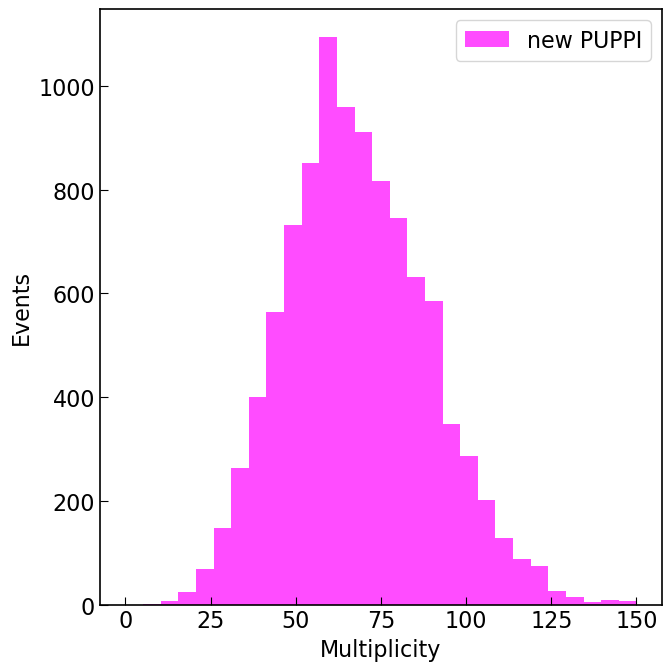

In [20]:
# Plot. new PUPPI collection
plt.figure(figsize=(7,7))

bins = np.linspace(0, 150, 30)  # 10 bins from 0 to 30
plt.hist(new_selected_counts, bins=bins, alpha=0.7, color='magenta', label='new PUPPI')
plt.xlabel('Multiplicity')
plt.ylabel('Events')
plt.legend()


plt.tight_layout()
plt.show()

## Comparison between the 2 PUPPI collections


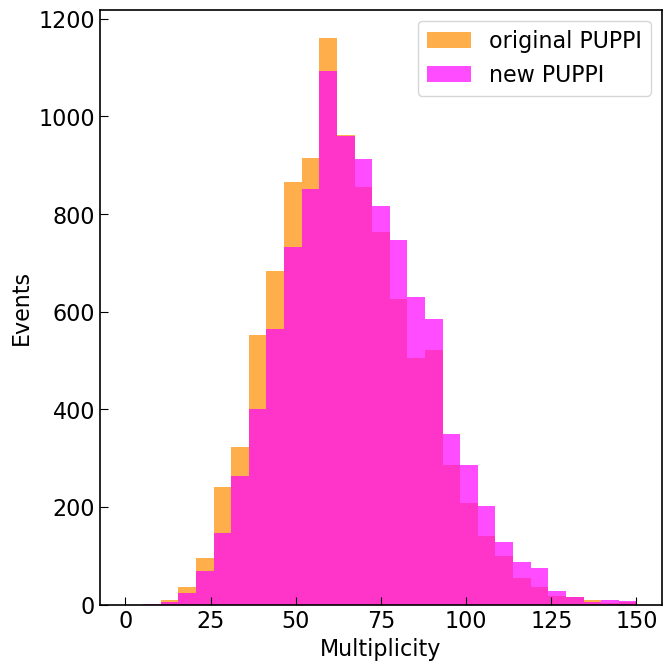

In [21]:
plt.figure(figsize=(7,7))

bins = np.linspace(0, 150, 30)  # 10 bins from 0 to 30
plt.hist(selected_counts, bins=bins, alpha=0.7, color='darkorange', label='original PUPPI')

plt.hist(new_selected_counts, bins=bins, alpha=0.7, color='magenta', label='new PUPPI')
plt.xlabel('Multiplicity')
plt.ylabel('Events')
plt.legend()


plt.tight_layout()
plt.show()

## Compute MET for the two PUPPI collections

In [22]:
# MET for current PUPPI
met_x = [-np.sum(pt * np.cos(phi)) for pt, phi in zip(selected_pts, selected_phis)]
met_y = [-np.sum(pt * np.sin(phi)) for pt, phi in zip(selected_pts, selected_phis)]
met = [np.sqrt(mx**2 + my**2) for mx, my in zip(met_x, met_y)]

# MET for new PUPPI
new_met_x = [-np.sum(pt * np.cos(phi)) for pt, phi in zip(new_selected_pts, new_selected_phis)]
new_met_y = [-np.sum(pt * np.sin(phi)) for pt, phi in zip(new_selected_pts, new_selected_phis)]
new_met = [np.sqrt(mx**2 + my**2) for mx, my in zip(new_met_x, new_met_y)]

# GEN MET
genMet = arrays["genMetCentral_pt"]



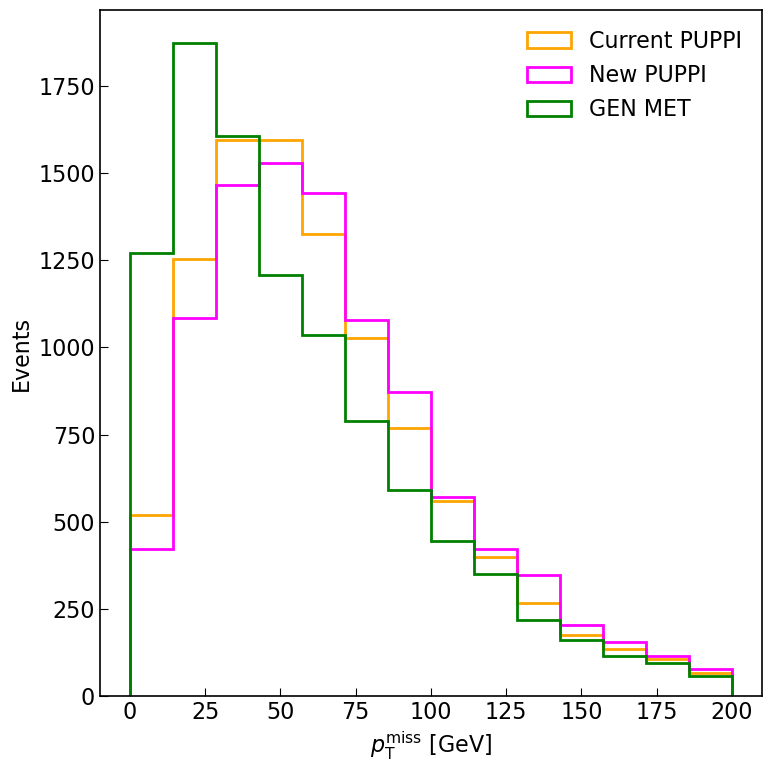

Integral recomputed MET: 9784
Integral stored MET: 9795


In [23]:
# ---------- Plot ----------
plt.figure(figsize=(8,8))

bins = np.linspace(0, 200, 15)   # 20 bins → 200/10 GeV
hist_old, _ = np.histogram(met, bins=bins)
hist_new, _ = np.histogram(new_met, bins=bins)
hist_gen, _ = np.histogram(genMet, bins=bins)


plt.hist(new_met, bins=bins, histtype='step', label='Current PUPPI', color='orange',
         linewidth=2)
plt.hist(met, bins=bins, histtype='step', label='New PUPPI', color='magenta',
         linewidth=2)
plt.hist(genMet, bins=bins, histtype='step', label='GEN MET',  color='green',
         linewidth=2)

# ---------- Labels ----------
plt.xlabel(r"$p_{\mathrm{T}}^{\text{miss}}$ [GeV]")
plt.ylabel("Events")

plt.legend(frameon=False)

# Remove top/right spines (CMS style)


# ---------- CMS Label ----------
#plt.text(0.02, 0.95, "CMS", transform=plt.gca().transAxes,
#         fontsize=20, fontweight='bold', va='top')
#plt.text(0.14, 0.95, "Preliminary", transform=plt.gca().transAxes,
#         fontsize=16, va='top')

plt.tight_layout()
plt.show()

int_old = np.sum(hist_old)
int_new = np.sum(hist_new)

print(f"Integral recomputed MET: {int_old}")
print(f"Integral stored MET: {int_new}")

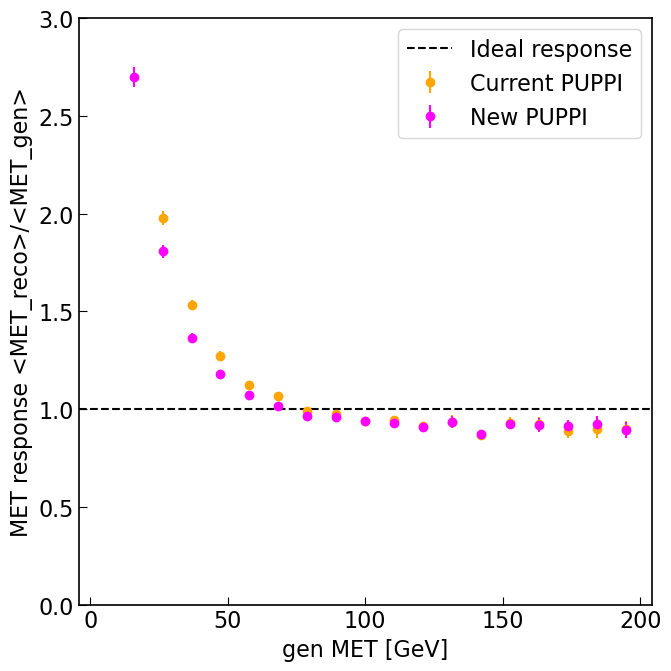

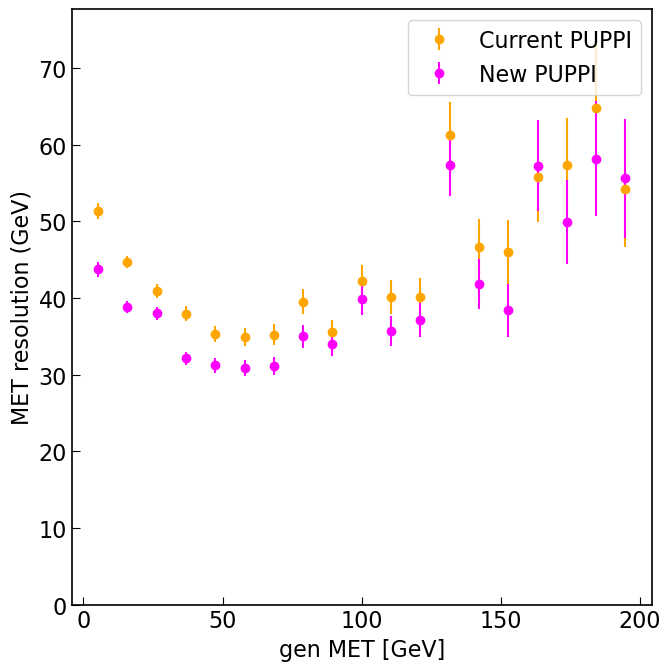

In [24]:
# Assume met_stored = stored puppiMET_pt, met_computed = your recomputed MET
met = np.array(met)
new_met = np.array(new_met)

bins = np.linspace(0, 200, 20)
bin_centers = []

response_stored = []
response_computed = []
response_err_stored = []
response_err_computed = []

resolution_stored = []
resolution_computed = []
resolution_err_stored = []
resolution_err_computed = []

for i in range(len(bins)-1):
    mask = (genMet >= bins[i]) & (genMet < bins[i+1])
    if np.sum(mask) == 0:
        continue
    bin_centers.append(0.5*(bins[i]+bins[i+1]))

    # Response
    resp_s = np.mean(met[mask])/np.mean(genMet[mask])
    resp_c = np.mean(new_met[mask])/np.mean(genMet[mask])
    response_stored.append(resp_s)
    response_computed.append(resp_c)
    response_err_stored.append(np.std(met[mask]/genMet[mask])/np.sqrt(np.sum(mask)))
    response_err_computed.append(np.std(new_met[mask]/genMet[mask])/np.sqrt(np.sum(mask)))

    # Resolution
    diff_s = met[mask]-genMet[mask]
    diff_c = new_met[mask]-genMet[mask]
    res_s = np.sqrt(np.mean(diff_s**2))
    res_c = np.sqrt(np.mean(diff_c**2))
    resolution_stored.append(res_s)
    resolution_computed.append(res_c)
    resolution_err_stored.append(np.std(diff_s)/np.sqrt(np.sum(mask)))
    resolution_err_computed.append(np.std(diff_c)/np.sqrt(np.sum(mask)))

# ------------------------
# Response comparison
plt.figure(figsize=(7,7))
plt.errorbar(bin_centers, response_stored, yerr=response_err_stored, fmt='o', label='Current PUPPI', color='orange')
plt.errorbar(bin_centers, response_computed, yerr=response_err_computed, fmt='o', label='New PUPPI', color='magenta')
plt.axhline(1.0, color='k', linestyle='--', label='Ideal response')
plt.xlabel("gen MET [GeV]")
plt.ylabel("MET response <MET_reco>/<MET_gen>")
plt.ylim(0, 3)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# ------------------------
# Resolution comparison
plt.figure(figsize=(7,7))
plt.errorbar(bin_centers, resolution_stored, yerr=resolution_err_stored, fmt='o', label='Current PUPPI', color='orange')
plt.errorbar(bin_centers, resolution_computed, yerr=resolution_err_computed, fmt='o', label='New PUPPI', color='magenta')
plt.xlabel("gen MET [GeV]")
plt.ylabel("MET resolution (GeV)")
plt.ylim(0, max(max(resolution_stored), max(resolution_computed))*1.2)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
